In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
import functools
from matplotlib import rc
rc('text', usetex=True)
sns.set(font='serif', style='white')
def movingaverage(data, window_width=10):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

### 16 node network real graph

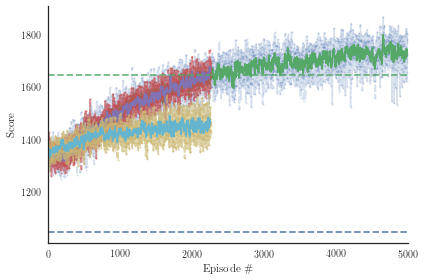

In [9]:
#with open('tmp/rewardgvedu_graphmodelv7slower.json') as f:
#    v7 = json.load(f)
#with open('tmp/rewardgiujh_graphmodelv9_1e-5_256.json') as f:
#    v9 = json.load(f)
#with open('tmp/rewardgiujh_graphmodelv9_1e-5_256_5000+.json') as f:
#    v9b = json.load(f)
#with open('tmp/rewardyydoj_graphmodelv10.json') as f:
#    v10 = json.load(f)
#with open('tmp/rewardecaeo_graphmodelv11.json') as f:
#    v11 = json.load(f)
#with open('tmp/rewardwsnva_graphmodelv12_quicker.json') as f:
#    v12 = json.load(f)
#with open('tmp/rewardbybav_gridv0.json') as f:
#    gridv0 = json.load(f) #256
with open('tmp/rewardrsqcb_gridv2.json') as f:
    gridv2 = json.load(f) #512 didnt save stupidly
with open('tmp/rewardnniwn_gridv3.json') as f:
    gridv3 = json.load(f)#quicker 1e-4 512
with open('tmp/rewardyurxg_gridv1.json') as f:
    gridv1 = json.load(f)
#v9 = v9['data'][1::]+v9b['data'][1::]
fig,ax = plt.subplots(1)
#fig.set_size_inches(3.5,3.5)
xmax = 5000
xmin = 0
#ax.plot(v7['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label = '128')

#ax.plot(v9, linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='9')
#ax.plot(v10['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='10')
#ax.plot(v11['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='11')
#ax.plot(v12['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='12')
#ax.plot(gridv0['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='256x256 grid learner')
ax.plot(gridv2['data'][1::], linestyle = '--', alpha=0.22, marker ='o', markersize=2, label='512x512 grid learner')
ax.plot(movingaverage(gridv2['data'][1::], window_width=10), alpha=1, linestyle='-', label='v2ma')

ax.plot(gridv1['data'][1::], linestyle = '--', alpha=0.62, marker ='o', markersize=2, label='512x512 grid learner save')
ax.plot(movingaverage(gridv1['data'], window_width=10), alpha=1, linestyle='-', label='v1ma')

ax.plot(gridv3['data'][1::], linestyle = '--', alpha=0.61, marker ='o', markersize=2, label='512x512 grid learner faster')
ax.plot(movingaverage(gridv3['data'], window_width=10), alpha=1, linestyle='-', label='v3ma')

#ax.plot(v9_32['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='256')
#ax.plot(v9_64['data'][1::], linestyle = '--', alpha=0.5, marker ='o', markersize=2, label='256')

#ax.plot([xmin,xmax],[1730, 1730], label='manual', linestyle = '--', alpha=0.85)
ax.plot([xmin,xmax],[1050, 1050], label='grid random strategy', linestyle = '--', alpha=0.85)

ax.plot([xmin,xmax],[1650, 1650], label='grid hard coded strategy', linestyle = '--', alpha=0.85)

ax.set_xlim([xmin, xmax])
#ax.set_ylim([500,2400])
ax.set_xlabel("Episode \#")
ax.set_ylabel("Score")
#ax.legend(loc='best')
sns.despine()
fig.tight_layout()
#fig.savefig('learningcurve.png', format='png', dpi=600)


In [57]:
statetracenaive['data'][0:3]

[[{'S0': [0, 10, 0, 0],
   'S1': [2, 10, 0, 0],
   'S10': [2, 10, 0, 0],
   'S11': [2, 10, 0, 0],
   'S12': [2, 10, 0, 0],
   'S13': [2, 10, 0, 0],
   'S14': [2, 10, 0, 0],
   'S15': [2, 10, 0, 0],
   'S2': [2, 10, 0, 0],
   'S3': [2, 10, 0, 0],
   'S4': [2, 10, 0, 0],
   'S5': [2, 10, 0, 0],
   'S6': [2, 10, 0, 0],
   'S7': [2, 10, 0, 0],
   'S8': [2, 10, 0, 0],
   'S9': [2, 10, 0, 0]},
  {'S0': [0, 6.52, -3.4800000000000004, 1],
   'S1': [2, 8.65, -1.3499999999999996, 1],
   'S10': [2, 8.65, -1.3499999999999996, 1],
   'S11': [2, 8.65, -1.3499999999999996, 1],
   'S12': [0, 8.65, -1.3499999999999996, 1],
   'S13': [2, 8.65, -1.3499999999999996, 1],
   'S14': [2, 8.65, -1.3499999999999996, 1],
   'S15': [2, 8.65, -1.3499999999999996, 1],
   'S2': [2, 8.65, -1.3499999999999996, 1],
   'S3': [2, 8.65, -1.3499999999999996, 1],
   'S4': [2, 8.65, -1.3499999999999996, 1],
   'S5': [2, 8.65, -1.3499999999999996, 1],
   'S6': [2, 8.65, -1.3499999999999996, 1],
   'S7': [2, 8.65, -1.349999999

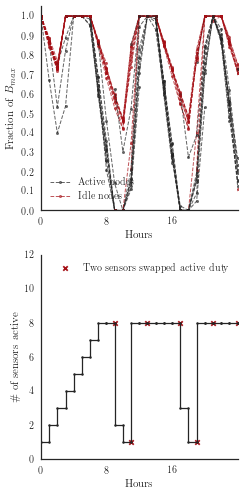

In [4]:
#with open('tmp/arcyn_5000_episodes_month.json') as f:
#    statetracelearned = json.load(f)
with open('tmp/spijm_testing_gridworld_randomised.json') as f:
    statetracenaive = json.load(f)
def num_changes(d):
    any_changes =  {k:v for k,v in d.items() if v}
    return len(any_changes)
def plotone(statetrace):
    run=0
    startday = 0
    periods = 8#in three hours 8 periods make a full day
    duration =3#days
    select = [startday*periods,(startday+duration)*periods]
    fulldata = statetrace['data'][run]
    data = statetrace['data'][run][select[0]:select[1]+8]
    xs = list(range(len(fulldata)))[select[0]:select[1]+8]
    fig, (ax1,ax2) = plt.subplots(2,1)
    fig.set_size_inches(3.5,7)
    #fig, ax1 = plt.subplots(1)
    #fig.set_size_inches(8,4)
    bit = lambda i: 1 if i in [0,1] else 0
    for sensor in ['S'+str(i) for i in range(16)]:#['S0','S1','S2','S3']:
        ondata = np.asarray([i[sensor][1] for i in data])
        offdata = ondata.copy()
        statusdata = np.asarray([bit(i[sensor][0]) for i in data])
        ondata[statusdata==0] = np.nan
        offdata[statusdata==1] = np.nan
        label1 = 'Active nodes'
        label2 = 'Idle nodes'
        ax1.plot(xs, ondata,
                 linestyle='--',linewidth=1, color ='#252525',marker='o'
                 , markersize=3, alpha=0.7, label=label1 if sensor=='S0' else '')
        ax1.plot(xs, offdata,
                 linestyle='--',linewidth=1, color ="#a50f15",marker='o'
                 , markersize=3, alpha=0.7,label=label2 if sensor=='S0' else '')
    ticks = [i for i in range(select[0], select[1]) if i%8==0]
    ax1.set_xticks(ticks)
    ax2.set_xticks(ticks)
    ax1.set_xlim([select[0], select[1]])
    ax2.set_xlim([select[0], select[1]])
    
    #for sensor in ['S'+str(i) for i in range(16)]:
    #    ax2.plot(xs, [bit(i[sensor][0]) for i in data],
    #            linestyle='--', marker='o')
    merge = lambda a,b: {k:-bit(v[0])+bit(b[k][0]) for k,v in a.items()}
    blank = {s:0 for s in data[0]}
    transition_series = [merge(first, second) for first, second in zip(data, data[1::])]+[blank]
    switches = [num_changes(i) for i in transition_series]
    count_on = lambda d: sum([v[0]!=2 and v[1]!=0 for k,v in d.items()])
    #ax2b = ax2.twinx()
    counts = [count_on(d) for d in data]
    switch_scatter = [(xs[idx]+1, counts[idx])
                      for idx, switch in enumerate(switches) if switch==2]
    ax2.scatter([x for x,y in switch_scatter],[y for x,y in switch_scatter]
              ,color="#a50f15",s=20, marker='x', label='Two sensors swapped active duty',zorder=1)
    ax2.plot(xs, counts, color = '#252525',drawstyle='steps-post', 
             linestyle= '-',markersize=2.5, marker='o', linewidth=1.25)
    ax2.set_ylabel('\# of sensors active')
    ax2.set_xlabel('Hours')
    ax1.set_xlabel('Hours')
    ax1.set_ylabel(r'Fraction of $B_{max}$')
    #sns.despine()
    ax1.set_ylim([0,10.5])
    ax2.set_ylim([0,12])
    ax1.set_yticks([i for i in range(0,11)])
    ax1.set_yticklabels([i/10 for i in ax1.get_yticks()])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.legend(loc='best')
    ax1.legend(loc='best')
    fig.tight_layout()
    return fig,ax1

fig = plotone(statetracenaive)

### 2 node network real solar data

216.0 487.0 -666.0 860
136.5 402.0 -785.5


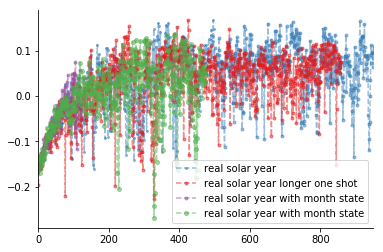

In [229]:
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_bignetwork.json') as f:
    rewardtrace = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_additional250episodes_epsiloninit0.1.json') as f:
    second_bout = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_secondadditional250episodes_epsiloninit0.1.json') as f:
    third_bout = json.load(f)
with open('tmp/rewardspoxo_realsolar_2node_fullyear_1000episodes_32experiencereplay.json') as f:
    oneshot = json.load(f)
with open('tmp/rewardxadde_realsolar_2node_fullyear_1000episodes_8experiencereplay.json') as f:
    oneshot8 = json.load(f)
with open('tmp/rewardfpdnp_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason = json.load(f)
with open('tmp/rewardjxqsi_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason2 = json.load(f)
fig, ax = plt.subplots(1)
one = len(rewardtrace['data'])
two = len(second_bout['data'])
three = len(third_bout['data'])
ax.plot([i/(365*8) for i in rewardtrace['data'][1::]], label='real solar year',
        alpha=0.5, marker='o', linestyle='--', markersize=2,c ='#377eb8')
ax.plot(range(one, one+two-1),[i/(365*8) for i in second_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot(range(one+two, one+two+three-1),[i/(365*8) for i in third_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot([i/(365*8) for i in oneshot8['data'][1::]], label='real solar year longer one shot',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#e41a1c')
ax.plot([i/(365*8) for i in withseason['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#984ea3')
ax.plot([i/(365*8) for i in withseason2['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=4,c="#4daf4a")
sns.despine()
ax.set_xlim([0,950])
ax.legend(loc='lower right')
#print(max(rewardtrace['data']), max(third_bout['data']), len(third_bout['data']))
print(oneshot8['data'][-1], max(oneshot8['data']), min(oneshot8['data'][100::]), len(oneshot8['data']))
print(withseason2['data'][-1], max(withseason2['data'][1::]), min(withseason2['data'][100::]))

### 4 node network stationary solar

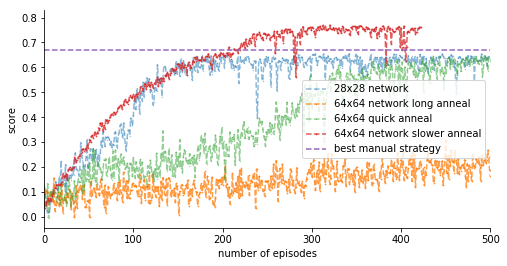

In [66]:
with open('tmp/rewardpavor_500_episodes_ddq_4nodes_slowerlearning.json') as f:
    trace = json.load(f)
with open('tmp/rewardarcyn_5000_episodes_month.json') as f:
    trace2 = json.load(f)
with open('tmp/rewardaeixz_fastdecayandslowlearning_bigger.json') as f:
    trace3 = json.load(f)
with open('tmp/rewardkcgdm_0.99995_decayrate.json') as f:
    trace4 = json.load(f)
with open('tmp/rewardtofyb_full year.json') as f:
    trace5 = json.load(f)
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
ax.plot([i/(28*8) for i in trace['data'][1::]], label='28x28 network',
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(28*8) for i in trace2['data'][1::]], label='64x64 network long anneal',
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([i/(28*8) for i in trace3['data'][1::]], label='64x64 quick anneal', 
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
#ax.plot([i/(28*8) for i in trace4['data'][1::]], label='bigger network slower anneal',
#        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(365*8) for i in trace5['data'][1::]], label='64x64 network slower anneal', 
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([0,5000],[150/(28*8), 150/(28*8)], label='best manual strategy', linestyle='--')
#ax.plot(trace4['data'][1::], label='not trimmed q learning with time')
ax.set_xlim([0,500])
ax.set_xlabel('number of episodes')
ax.set_ylabel('score')
ax.legend(loc='best')
sns.despine()


[15840, 16320]


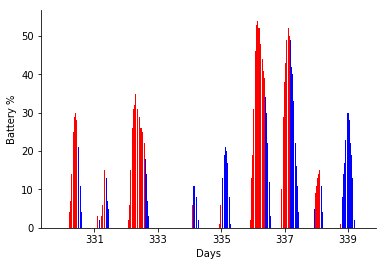

In [18]:
#with open('tmp/dtoei_testingonunseenyear.json') as f:
fig, ax = plt.subplots(1)
def test(i):
    i['S0'][0]==2
def get_plottable(i):
    return i['S0'][1]
sensor = 'S1'
batts = np.array([i[sensor][1] for i in data], dtype=float)
statuses =  np.array([i[sensor][0] for i in data])
onbatts = np.copy(batts)
offbatts = np.copy(batts)
offbatts[statuses!=2] = np.nan
onbatts[statuses==2] = np.nan
ax.bar(xs,onbatts,color='b')
ax.bar(xs,offbatts,color='r')
#ax.plot(offbatts, c='r')
#ax.plot(get_plottable(data))
#ax.set_xlim([0,337])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
ax.set_ylabel('Battery %')
sns.despine()

In [51]:
#debugging


144

In [17]:
import solar_sensor_env,math

In [18]:
step_number = solar_sensor_env.random_start_generator(3)
print(step_number)

2472


In [19]:
day_number = math.floor(step_number/(24/3))

In [25]:
day_number

309

In [21]:
2472/8

309.0

In [27]:
season_number = math.floor(day_number/30)

In [28]:
season_number

10

In [29]:
309/12

25.75

In [31]:
365/31

11.774193548387096

In [62]:
import calendar

In [63]:
monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]

In [67]:
cumulative = np.cumsum(monthdays)
withzero = [0]+list(cumulative)
list(zip(cumulative, cumulative[1::]))

[(31, 59),
 (59, 90),
 (90, 120),
 (120, 151),
 (151, 181),
 (181, 212),
 (212, 243),
 (243, 273),
 (273, 304),
 (304, 334),
 (334, 365)]

In [72]:
def daynumber_to_monthnumber(daynumber):
    monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]
    cumulative = np.cumsum(monthdays)
    cumulative = [0]+list(cumulative)
    monthpairs = zip(cumulative, cumulative[1::])
    return next(idx for idx, el in enumerate(monthpairs) if daynumber in range(*el))

In [75]:
daynumber_to_monthnumber(32)

1